# Introduction to Regression with Neural Networks in Tensorflow. 

There are many definitions for a regression problem but in our case, we're going to simplify it to be: predicting a number.

In [ ]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.7.0


## Creating data to view and fit

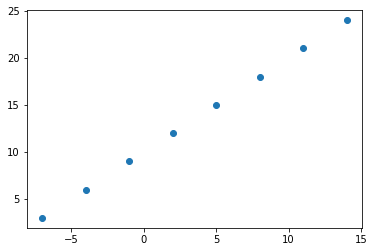

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create the features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create the labels 
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

## Regression input shapes and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
house_info.shape

TensorShape([3])

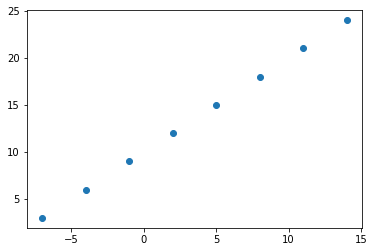

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [ ]:
# Take a single example of X
input_shape = X[0].shape

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

In [ ]:
# Let's take a look at the single examples invidually
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

# Steps in modelling with Tensorflow
1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model
2. Compiling a model - define the loss function (in order words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model)
3. Fitting a model - letting the model try to find patterns between X and y (features and labels)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae, # mae is short for mean absolute error
    optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
    metrics=["mae"]
)

# Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 471ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Make a prediction with the model
model.predict([17.0])

array([[12.716021]], dtype=float32)

## Improving a model
1. Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. Compiling a model - you might want to choose optimization function or perhaps change the learning rate of the optimization function.
3. Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).1. 

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae, # mae is short for mean absolute error
    optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
    metrics=["mae"]
)

# Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 231ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 4

In [ ]:
# Try and predict what y would be if X was 17.0
model.predict([17.0]) # the right answer is 27.0 (y = X + 10)

array([[30.158512]], dtype=float32)

In [ ]:
# Create a model with 3 hidden layers with 100 hidden units (neurons) each
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

# Compiling a model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=["mae"]
)

# fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 0s 410ms/step - loss: 14.3099 - mae: 14.3099
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 12.1094 - mae: 12.1094
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0935 - mae: 10.0935
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 7.7101 - mae: 7.7101
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 4.1882 - mae: 4.1882
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 6.0949 - mae: 6.0949
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 7.2319 - mae: 7.2319
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 5.8668 - mae: 5.8668
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 4.3110 - mae: 4.3110
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 3.9137 - mae: 3.9137
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss

In [ ]:
# Try and predict what y would be if X was 17.0
model.predict([17.0]) # the right answer is 27.0 (y = X + 10)

array([[30.006342]], dtype=float32)

## Evaluating a model

### Visualization

It's a good idea to visualize:
- The data - what data are you working with? What does it look like?
- The model itself - what does the architecture look like? What are the different shapes?
- The training of a model - how does a model perform while it learns?
- The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?

In [ ]:
# Make a bigger dataser
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [ ]:
# Make labels for the dataset (adhering to the same pattern as before)
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

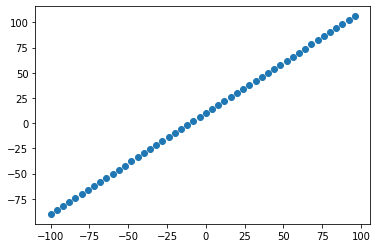

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### Split the sata into training/test set
Each set serves a specific purpose:
- Training set - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
- Validation set - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
- Test set - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

In [ ]:
# Check how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

### Visualizing the data


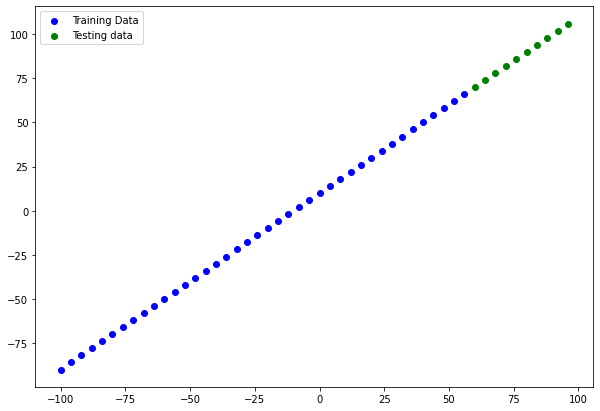

In [ ]:
plt.figure(figsize=(10, 7))
#Plot training data in blue
plt.scatter(X_train, y_train, c='b', label="Training Data")
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();


### Visualizing the model

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
# This will work after specifying the input shape
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Calling summary() on our model shows us the layers it contains, the output shape and the number of parameters.
- Total params -  total number of parameters in the model.
- Trainable parameters - these are the parameters (patterns) the model can update as it trains.
- Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

In [ ]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - l

In [ ]:
# Check the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


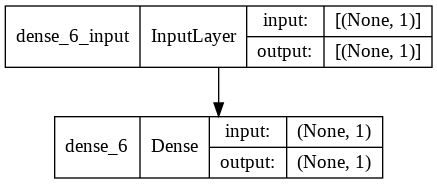

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### Visualizing model's predictions

In [ ]:
# Make predictions
y_preds = model.predict(X_test)
y_preds

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [ ]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

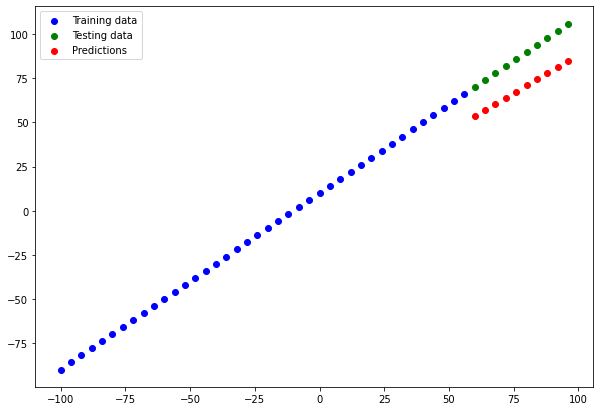

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

### Evaluating Predictions

Two of the main metrics used for regression problems are:
- Mean absolute error (MAE) - the mean difference between each of the predictions.
- Mean squared error (MSE) - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

In [ ]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 105ms/step - loss: 18.7453 - mae: 18.7453


[18.74532699584961, 18.74532699584961]

In [ ]:
# Calculate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([34.42891 , 30.943668, 27.45843 , 23.97319 , 20.487946, 17.202168,
       14.510478, 12.419336, 11.018796, 10.212349], dtype=float32)>

In [ ]:
# Check the test label tensor values
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [ ]:
# Check the predictions tensor values (notice the extra square brackets)
y_preds

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [ ]:
# Check the tensor shapes
y_test.shape, y_preds.shape

((10,), (10, 1))

In [ ]:
# Shape before squeeze()
y_preds.shape

(10, 1)

In [ ]:
# Shape after squeeze()
y_preds.squeeze().shape

(10,)

In [ ]:
# What do they look like?
y_test, y_preds.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([53.57109 , 57.05633 , 60.541573, 64.02681 , 67.512054, 70.99729 ,
        74.48254 , 77.96777 , 81.45301 , 84.938255], dtype=float32))

In [ ]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>

In [ ]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=353.57336>

In [ ]:
# Returns the same as tf.metrics.mean_absolute_error()
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=18.745327377319335>

In [ ]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

## Running experiments to improve a model

3 main ways to improve a model:
1. Get more data: get more examples for your model to train on (more opportunities to learn patterns).
2. Make your model larger (use a more complex model): this might come in the form of more layers or more hidden units in each layer.
3. Train for longer: give your model more of a chance to find the patterns in the data.

### Build model 1

In [ ]:
# same as original model, 1 layer, trained for 100 epochs

# set random seed
tf.random.set_seed(42)

# create model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                           
])

# compile the model
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - l

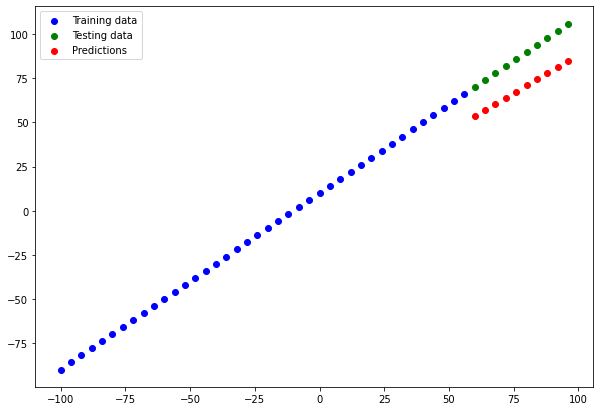

In [ ]:
# Make predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(18.745327, 353.57336)

### Build model 2

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Build model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# compile model
model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 22.6625 - mae: 22.6625
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 16.9439 - mae: 16.9439
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 13.8059 - mae: 13.8059
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 17.4504 - mae: 17.4504
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 12.0637 - mae: 12.0637
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.8335 - mae: 9.8335
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 10.7023 - mae: 10.7023
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 10.8713 - mae: 10.8713
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 38.0435 - mae: 38.0435
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 25.6226 - mae: 25.6226
Epoch 11/100
2/2 [==============================] - 0s 8ms/st

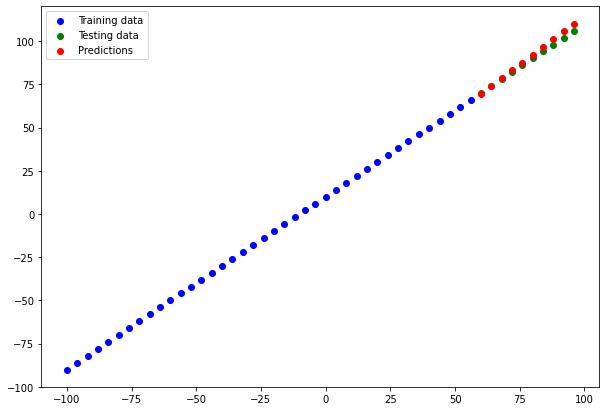

In [ ]:
# make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(1.9098114, 5.459232)

### Build model 3

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Build model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 7ms/step - loss: 22.6625 - mae: 22.6625
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 16.9439 - mae: 16.9439
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 13.8059 - mae: 13.8059
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 17.4504 - mae: 17.4504
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 12.0637 - mae: 12.0637
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 9.8335 - mae: 9.8335
Epoch 7/500
2/2 [==============================] - 0s 6ms/step - loss: 10.7023 - mae: 10.7023
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 10.8713 - mae: 10.8713
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 38.0435 - mae: 38.0435
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 25.6226 - mae: 25.6226
Epoch 11/500
2/2 [==============================] - 0s 6ms/st

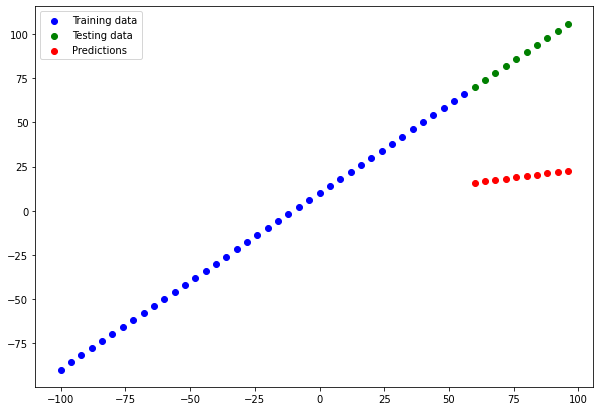

In [ ]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(68.68786, 4804.4717)

## Comparing Results

In [ ]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

In [ ]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,1.909811,5.459232
2,model_3,68.687859,68.687859


In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


## Saving a model

There are two ways to save a model in TensorFlow:
1. The SavedModel format (default).
2. The HDF5 format.

In [ ]:
# Save a model using the SavedModel format
model_2.save('best_model_SavedModel_format')

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [ ]:
# Check it out - outputs a protobuf binary file (.pb) as well as other files
!ls best_model_SavedModel_format

assets	keras_metadata.pb  saved_model.pb  variables


In [ ]:
# Save a model using the HDF5 format
model_2.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

In [ ]:
# Check it out
!ls best_model_HDF5_format.h5

best_model_HDF5_format.h5


## Loading a model
We can load a saved model using the load_model() method.

In [ ]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 with the SavedModel version (should return True)
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

True

In [ ]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 with the loaded HDF5 version (should return True)
h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

True

# A larger example

We are going to try to predict the cost of medical insurance for individuals based on a number of different parameters such as age, sex, bmi, children, smoking_status and residential_region. 

In [ ]:
# Import required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
# check out the insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head() # view the converted columns

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X and y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

X.head(), y.head()

(   age     bmi  children  ...  region_northwest  region_southeast  region_southwest
 0   19  27.900         0  ...                 0                 0                 1
 1   18  33.770         1  ...                 0                 1                 0
 2   28  33.000         3  ...                 0                 1                 0
 3   33  22.705         0  ...                 1                 0                 0
 4   32  28.880         0  ...                 1                 0                 0
 
 [5 rows x 11 columns], 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 Name: charges, dtype: float64)

In [ ]:
# Create training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42) # set random state for reproducible splits

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)


Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8868.5918 - mae: 8868.5918
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7887.1606 - mae: 7887.1606
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7537.0947 - mae: 7537.0947
Epoch 4/100
34/34 [==============================] - 0s 955us/step - loss: 7859.4346 - mae: 7859.4346
Epoch 5/100
34/34 [==============================] - 0s 964us/step - loss: 7639.6699 - mae: 7639.6699
Epoch 6/100
34/34 [==============================] - 0s 957us/step - loss: 7578.0850 - mae: 7578.0850
Epoch 7/100
34/34 [==============================] - 0s 953us/step - loss: 7514.6177 - mae: 7514.6177
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7694.1338 - mae: 7694.1338
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7595.9136 - mae: 7595.9136
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7735.9116 - mae: 7

In [ ]:
# Check the results of the insurance model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 8628.2393 - mae: 8628.2393


[8628.2392578125, 8628.2392578125]

Our model didn't perform very well, let's try a bigger model
We'll try three things:
- Increasing the number of layers (2 -> 3). 
- Increasing the number of units in each layer (except for the output layer).
- Changing the optimizer (from SGD to Adam).

In [ ]:
# set ranomd seed
tf.random.set_seed(42)

# Build model
insurance_model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile model
insurance_model2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

# Fit the model
history = insurance_model2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9457.7227 - mae: 9457.7227
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7409.0811 - mae:

In [ ]:
# Evaluate our larger model
insurance_model2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4924.5093 - mae: 4924.5093


[4924.50927734375, 4924.50927734375]

Much better! Using a larger model and the Adam optimizer results in almost half the error as the previous model.

Text(0.5, 0, 'epochs')

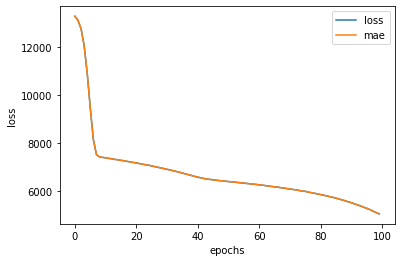

In [ ]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [ ]:
# Try training for a little longer (100 more epochs)
history_2 = insurance_model2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 4989.6201 - mae: 4989.6201
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 4915.0635 - mae: 4915.0635
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 4841.5186 - mae: 4841.5186
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 4761.9351 - mae: 4761.9351
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 4682.8105 - mae: 4682.8105
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 4606.6265 - mae: 4606.6265
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 4510.3018 - mae: 4510.3018
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 4421.1685 - mae: 4421.1685
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 4349.3486 - mae: 4349.3486
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 4256.1733 - mae: 4256.1733

In [ ]:
# Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 1ms/step - loss: 3495.8054 - mae: 3495.8054


(3495.805419921875, 3495.805419921875)

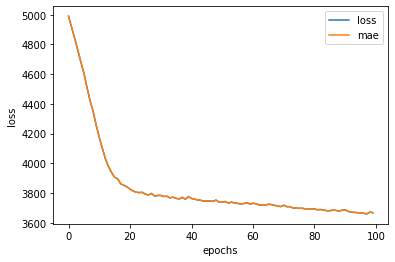

In [ ]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable

In [ ]:
# Try training for a little longer (100 more epochs)
history_3 = insurance_model2.fit(X_train, y_train, epochs=500)

Epoch 1/500
34/34 [==============================] - 0s 1ms/step - loss: 3657.6953 - mae: 3657.6953
Epoch 2/500
34/34 [==============================] - 0s 1ms/step - loss: 3651.6067 - mae: 3651.6067
Epoch 3/500
34/34 [==============================] - 0s 1ms/step - loss: 3654.1047 - mae: 3654.1047
Epoch 4/500
34/34 [==============================] - 0s 1ms/step - loss: 3654.4326 - mae: 3654.4326
Epoch 5/500
34/34 [==============================] - 0s 1ms/step - loss: 3653.3511 - mae: 3653.3511
Epoch 6/500
34/34 [==============================] - 0s 1ms/step - loss: 3660.8716 - mae: 3660.8716
Epoch 7/500
34/34 [==============================] - 0s 1ms/step - loss: 3651.4692 - mae: 3651.4692
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 3648.3269 - mae: 3648.3269
Epoch 9/500
34/34 [==============================] - 0s 1ms/step - loss: 3644.4333 - mae: 3644.4333
Epoch 10/500
34/34 [==============================] - 0s 1ms/step - loss: 3653.6536 - mae: 3653.6536

In [ ]:
# Evaluate the model trained for 700 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 1ms/step - loss: 3167.3381 - mae: 3167.3381


(3167.338134765625, 3167.338134765625)

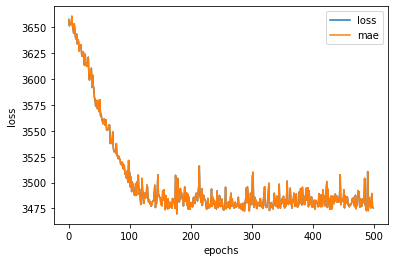

In [ ]:
# Plot the model trained for 700 total epochs loss curves
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable

# Preprocessing data (normalization and standardization)
A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called normalization (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call standardization which converts all of your data to unit variance and 0 mean.

Steps to take to preprocess data for a neural network:
- Turning all of your data to numbers (a neural network can't handle strings).
- Making sure your data is in the right shape (verifying input and output shapes).
- Feature Scaling

Feature Scaling:
- Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minmum. This is also referred to as min-max scaling. Reuslts in faster convergence time.
- Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by substracting the mean value from the target feature and then dividing it by the standard deviation.

Which one should you choose:
With neural networks you'll tend to favour normalization as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.

In [ ]:
# Normalizing data
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
# Check out the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


make_column_transformer: build a multi-step data preprocessing function for the following transformations:
- MinMaxScaler: Make sure all numerical columns are normalized (between 0 and 1)
- OneHotEncoder: One hot encode the non-numerical columns

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)

ct = make_column_transformer(
    (MinMaxScaler(), ["age", 'bmi', "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and tests sets (use random state to ensure the same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# Non-normalized and non-one-hot encoded data example
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
# Normalized and one-hot encoded example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [ ]:
# Our data is normalized and numerical, let's model it

# Set random seed
tf.random.set_seed(42)

# Build the model
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

insurance_model_3.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13342.6475 - mae: 13342.6475
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 11925.96

In [ ]:
# Evaulate 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3171.5774 - mae: 3171.5774


In [ ]:
# Compare modelling results from non-normalized data and normalized data
insurance_model_2_mae, insurance_model_3_mae

(3167.338134765625, 3171.577392578125)